In [1]:
import numpy as np
import pandas as pd

In [5]:
CM_btc = pd.read_csv('BTC_USD_2019-04-18_2020-04-17-CoinDesk.csv')
CM_eth = pd.read_csv('ETH_USD_2019-04-18_2020-04-17-CoinDesk.csv')
CM_ltc = pd.read_csv('LTC_USD_2019-04-18_2020-04-17-CoinDesk.csv')
#traemos nuestros dataset de la pagina:
#https://www.coindesk.com/price/bitcoin hay seleccionamos los que ocupemos, hay seleccionas el tiempo para escoger tu dataset.
#lo que si es que el dataset va cambiando cada momento, porque lo que es recomendable actualizarlo.

In [6]:
CM_btc.head()

,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
0,BTC,2019-04-18,5276.558982,5218.079843,5310.487045,5214.802942
1,BTC,2019-04-19,5266.661246,5279.181428,5345.759303,5212.188471
2,BTC,2019-04-20,5292.148330,5266.661261,5353.286830,5259.426827
3,BTC,2019-04-21,5276.558318,5292.148328,5330.917314,5195.633537
4,BTC,2019-04-22,5398.433417,5282.088267,5408.841963,5239.165296


In [7]:
CM_eth.head()

,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
0,ETH,2019-04-18,173.613826,166.771138,175.997343,166.297910
1,ETH,2019-04-19,173.395004,174.165291,174.723233,169.892112
2,ETH,2019-04-20,173.203020,173.395004,178.199952,171.504871
3,ETH,2019-04-21,170.160850,173.203020,174.668026,166.883706
4,ETH,2019-04-22,172.812844,170.213780,173.722649,168.689501


In [8]:
CM_ltc.head()

,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
0,LTC,2019-04-18,82.298533,78.997950,83.805896,78.947783
1,LTC,2019-04-19,82.126312,82.012250,83.569821,80.007505
2,LTC,2019-04-20,81.422442,82.126312,83.146828,80.054700
3,LTC,2019-04-21,77.077868,81.422441,82.162681,73.733847
4,LTC,2019-04-22,77.820246,77.224258,78.185135,75.787091


In [12]:
#crearemos un nuevo dataframe que mantenga los diferentes precios de cierre(closing price) de las 3 crytomonedas que tenemos.
CM = pd.DataFrame({'BTC': CM_btc['Closing Price (USD)'],
                   'ETH': CM_eth['Closing Price (USD)'],
                   'LTC': CM_ltc['Closing Price (USD)']
    
})

In [13]:
CM #ahora se nos mostraran en como quedaron sus precios cierre actualmente.

,BTC,ETH,LTC
0,5276.558982,173.613826,82.298533
1,5266.661246,173.395004,82.126312
2,5292.148330,173.203020,81.422442
3,5276.558318,170.160850,77.077868
4,5398.433417,172.812844,77.820246
...,...,...,...
360,6889.863772,158.318545,41.524451
361,6887.554908,159.772024,41.223377
362,6718.799950,155.729261,40.196643
363,7166.582817,174.070997,42.992348


In [14]:
CM.describe()
#esto nos ayuda a conseguir una estadistica sobre los datos.
#como se logra observar aqui:
#mean es para el valor o precio actual que tiene
#std es para el estandar
#min para el precio minimo a tratar

,BTC,ETH,LTC
count,365.000000,365.000000,365.000000
mean,8571.225775,194.138590,70.649229
std,1667.667553,48.038488,26.191975
min,4944.702336,107.898345,32.053195
25%,7315.367765,160.917868,49.807962
50%,8548.948322,182.243815,65.246522
75%,9838.900016,224.238760,85.241169
max,12575.904067,324.130855,139.383189


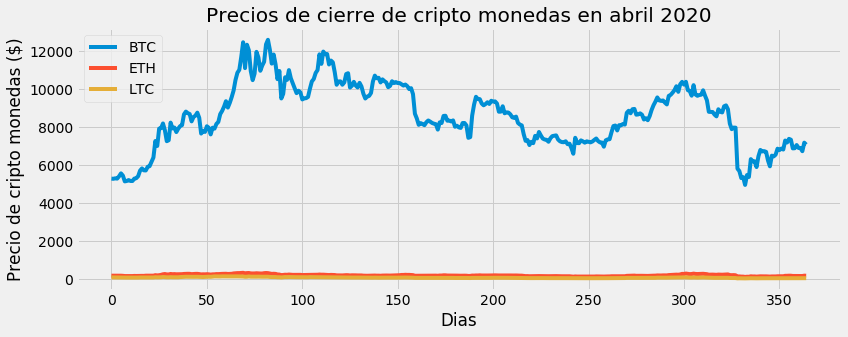

In [18]:
#ahora visualizaremos mejor los precios de cierre de cada cripto moneda
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

Crip_val = CM
plt.figure(figsize = (12.2, 4.5))
for c in Crip_val.columns.values:
    plt.plot(Crip_val[c],label = c)

plt.title('Precios de cierre de cripto monedas en abril 2020')
plt.xlabel('Dias')
plt.ylabel('Precio de cripto monedas ($)')
plt.legend(Crip_val.columns.values, loc ='upper left')
plt.show()

In [21]:
#escala de los datos
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0, 100))
scaled = min_max_scaler.fit_transform(CM)
scaled

array([[ 4.34868135, 30.39111991, 46.81388292],
       [ 4.21898046, 30.28992211, 46.65342432],
       [ 4.55296565, 30.20113653, 45.99762354],
       ...,
       [23.24794543, 22.12013187,  7.58730004],
       [29.1157351 , 30.60254549, 10.19207487],
       [27.78566375, 28.91211741,  9.73412184]])

In [22]:
CM_scale = pd.DataFrame(scaled, columns = CM.columns)
#se convierte los datos escalados a dataframes

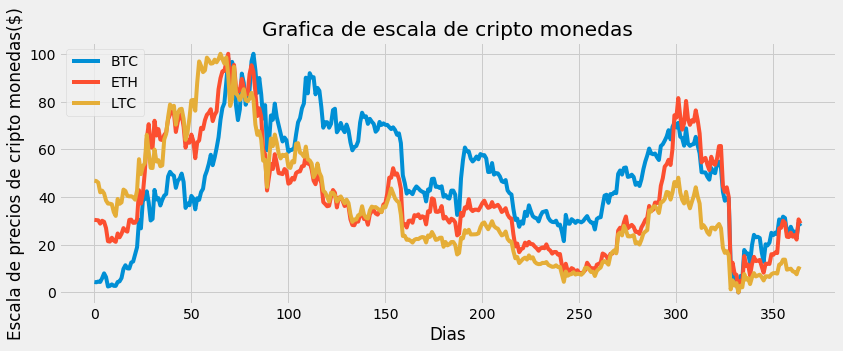

In [24]:
#visualizaremos los datos escalados
Crip_val = CM_scale

plt.figure(figsize=(12.4, 4.5))
for c in Crip_val.columns.values:
    plt.plot(Crip_val[c], label=c)
    
plt.title('Grafica de escala de cripto monedas')
plt.xlabel('Dias')
plt.ylabel('Escala de precios de cripto monedas($)')
plt.legend(Crip_val.columns.values, loc='upper left')
plt.show()

In [25]:
#ahora obtendremos la devolucion diaria simple(Daily simple return)
DSR = CM.pct_change(1)
DSR

,BTC,ETH,LTC
0,NaN,NaN,NaN
1,-0.001876,-0.001260,-0.002093
2,0.004839,-0.001107,-0.008571
3,-0.002946,-0.017564,-0.053358
4,0.023097,0.015585,0.009632
...,...,...,...
360,-0.021804,-0.022864,-0.027887
361,-0.000335,0.009181,-0.007251
362,-0.024501,-0.025303,-0.024907
363,0.066646,0.117780,0.069551


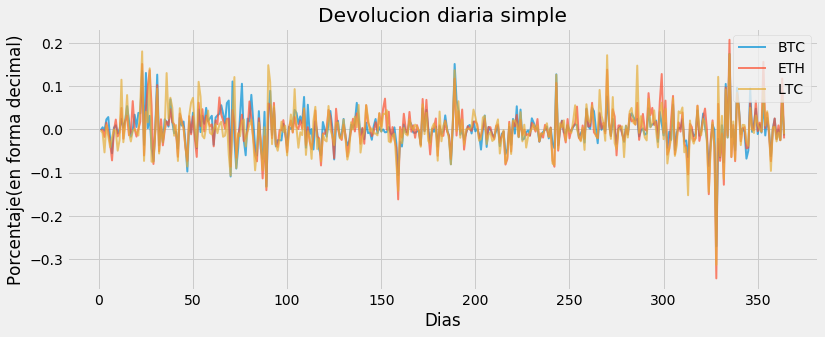

In [26]:
#Visualizacion de la devoluacion diaria simple
plt.figure(figsize=(12, 4.5))

for c in DSR.columns.values:
    plt.plot(DSR.index, DSR[c], label= c, lw= 2, alpha=.7)
    
plt.title('Devolucion diaria simple')
plt.ylabel('Porcentaje(en forma decimal)')
plt.xlabel('Dias')
plt.legend(DSR.columns.values, loc='upper right')
plt.show()

In [27]:
#Ahora obtendremos la volatibilidad
print('La volatibilidad de las cripto monedas')
DSR.std()

La volatibilidad de las cripto monedas


BTC    0.041259
ETH    0.047964
LTC    0.051421
dtype: float64

In [28]:
#Ahora el promedio de la devolucion diaria simple
DSR.mean()

BTC    0.001663
ETH    0.001141
LTC   -0.000474
dtype: float64

In [29]:
#ahora obtendremos la correlacion
DSR.corr()

,BTC,ETH,LTC
BTC,1.000000,0.837760,0.771363
ETH,0.837760,1.000000,0.860079
LTC,0.771363,0.860079,1.000000


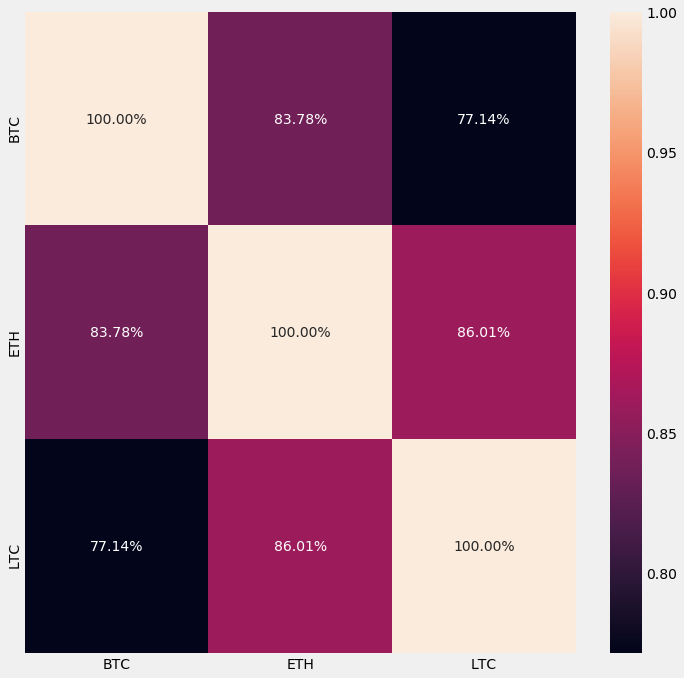

In [30]:
#Visualisaremos ahora la correlacion
import seaborn as sns

plt.subplots(figsize=(11,11))
sns.heatmap(DSR.corr(), annot=True, fmt= '.2%')

In [33]:
#Ahora por ultimo obtendremos la devolucion diaria comulativa simple(daily cumulative simple return)
DCSR = (DSR+1).cumprod()
DCSR

,BTC,ETH,LTC
0,NaN,NaN,NaN
1,0.998124,0.998740,0.997907
2,1.002954,0.997634,0.989355
3,1.000000,0.980111,0.936564
4,1.023097,0.995386,0.945585
...,...,...,...
360,1.305749,0.911901,0.504559
361,1.305312,0.920272,0.500901
362,1.273330,0.896987,0.488425
363,1.358192,1.002633,0.522395


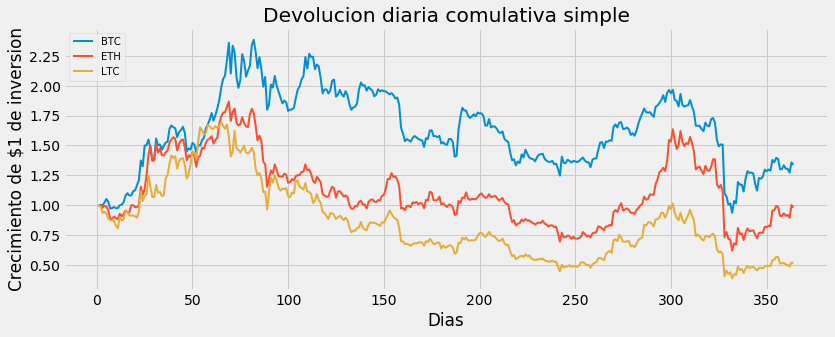

In [34]:
#Por ultimo ahora vamos a la visualizacion de la DCSR
plt.figure(figsize=(12.2,4.5))
for c in DCSR.columns.values:
    plt.plot(DCSR.index, DCSR[c], lw=2, label=c)

plt.title('Devolucion diaria comulativa simple')
plt.xlabel('Dias')
plt.ylabel('Crecimiento de $1 de inversion')
plt.legend(DCSR.columns.values, loc='upper left', fontsize=10)
plt.show()